<a href="https://colab.research.google.com/github/nrrajuu/Deep-Learning/blob/main/Stock_Market_Data_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
df = yf.download('ABBV',end='2022-12-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,34.919998,35.400002,34.099998,35.119999,23.325546,13767900
2013-01-03,35.000000,35.000000,34.160000,34.830002,23.132948,16739300
2013-01-04,34.619999,34.889999,34.250000,34.389999,22.840714,21372100
2013-01-07,34.150002,35.450001,34.150002,34.459999,22.887205,17897100
2013-01-08,34.290001,34.639999,33.360001,33.709999,22.389076,17863300
...,...,...,...,...,...,...
2022-12-13,166.949997,167.500000,164.669998,164.789993,164.789993,5050400
2022-12-14,164.600006,165.979996,162.830002,164.860001,164.860001,4485400
2022-12-15,163.889999,164.610001,161.949997,163.100006,163.100006,5268300


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df.shape

(2510, 6)

In [ ]:
training_set = df.iloc[:2000, 1:2].values
test_set = df.iloc[2000:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (-1, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 2000):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50)))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
62/62 [==============================] - 22s 39ms/step - loss: 0.0156
Epoch 2/50
62/62 [==============================] - 2s 34ms/step - loss: 0.0056
Epoch 3/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0048
Epoch 4/50
62/62 [==============================] - 1s 20ms/step - loss: 0.0045
Epoch 5/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 6/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0043
Epoch 7/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0039
Epoch 8/50
62/62 [==============================] - 2s 28ms/step - loss: 0.0035
Epoch 9/50
62/62 [==============================] - 2s 34ms/step - loss: 0.0038
Epoch 10/50
62/62 [==============================] - 2s 35ms/step - loss: 0.0032
Epoch 11/50
62/62 [==============================] - 2s 36ms/step - loss: 0.0031
Epoch 12/50
62/62 [==============================] - 2s 37ms/step - loss: 0.0030
Epoch 13/50
62/62 [=================

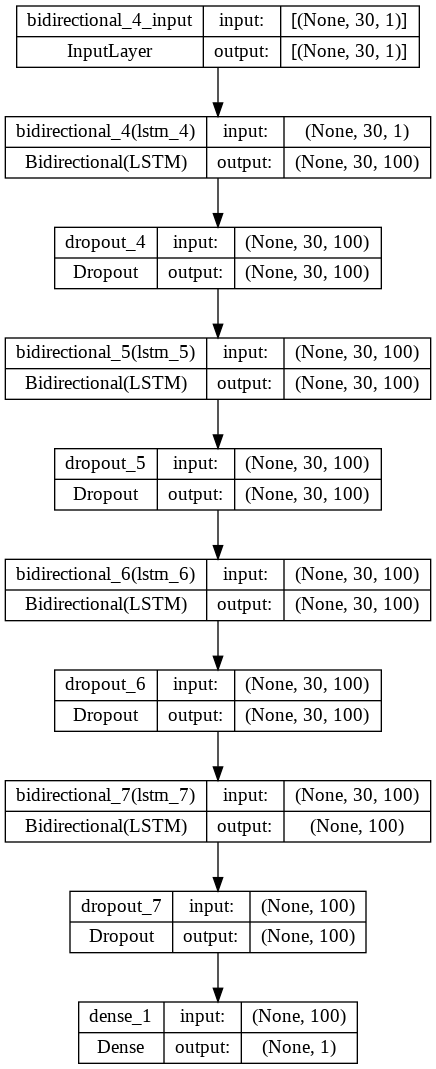

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(model,show_shapes=True)


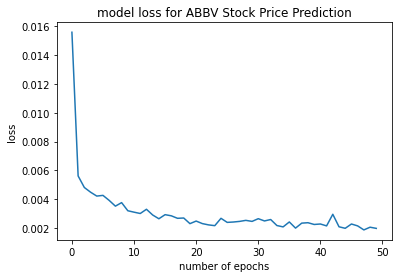

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss for ABBV Stock Price Prediction')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.show()

In [ ]:
dataset_test = df.iloc[2000:, 1:2]
dataset_test.shape

(510, 1)

In [ ]:
dataset_train = df.iloc[:2000, 1:2]
dataset_test = df.iloc[2000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 509):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(479, 30, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 3s 9ms/step


In [ ]:
true_y=dataset_test.values

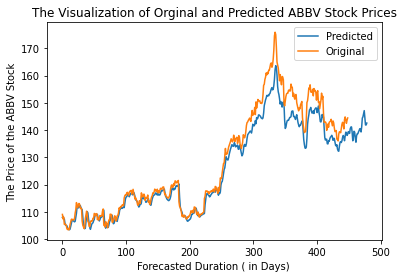

In [ ]:


plt.plot(predicted_stock_price, label='Predicted')
plt.plot(true_y[0:449], label='Original')
plt.xlabel('Forecasted Duration ( in Days) ')
plt.ylabel('The Price of the ABBV Stock')
plt.title('The Visualization of Orginal and Predicted ABBV Stock Prices')
plt.legend()


In [ ]:
predicted_stock_price.shape

(479, 1)

In [ ]:
true_y[0:479].shape

(479, 1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
error=math.sqrt(mean_squared_error(predicted_stock_price,true_y[0:479]))
error

4.643807453136207

In [ ]:
df = yf.download('GOOG',end='2022-12-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2022-12-13,98.070000,99.800003,95.379997,95.849998,95.849998,34788500
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df.shape

(4617, 6)

In [ ]:
training_set = df.iloc[:4300, 1:2].values
test_set = df.iloc[4300:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (-1, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 4300):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50)))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
134/134 [==============================] - 16s 24ms/step - loss: 0.0159
Epoch 2/50
134/134 [==============================] - 3s 24ms/step - loss: 0.0033
Epoch 3/50
134/134 [==============================] - 3s 24ms/step - loss: 0.0030
Epoch 4/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0026
Epoch 5/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0031
Epoch 6/50
134/134 [==============================] - 4s 32ms/step - loss: 0.0024
Epoch 7/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0023
Epoch 8/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0025
Epoch 9/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0024
Epoch 10/50
134/134 [==============================] - 3s 23ms/step - loss: 0.0022
Epoch 11/50
134/134 [==============================] - 4s 27ms/step - loss: 0.0020
Epoch 12/50
134/134 [==============================] - 4s 26ms/step - loss: 0.0021
Epoch 13/50


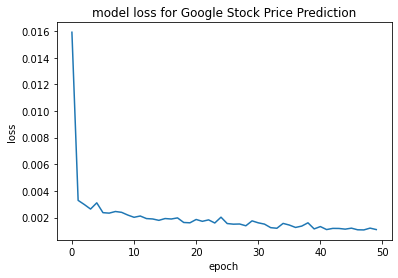

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss for Google Stock Price Prediction')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
dataset_test = df.iloc[4300:, 1:2]
dataset_test.shape

(317, 1)

In [ ]:
dataset_train = df.iloc[:4300, 1:2]
dataset_test = df.iloc[4300:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 316):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(286, 30, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 [==============================] - 4s 9ms/step


In [ ]:
true_y=dataset_test.values

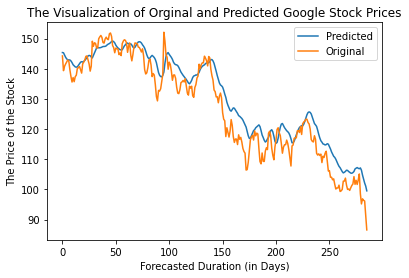

In [ ]:
plt.plot(predicted_stock_price, label='Predicted')
plt.plot(true_y[0:286], label='Original')
plt.xlabel('Forecasted Duration (in Days)')
plt.ylabel('The Price of the Stock')
plt.title('The Visualization of Orginal and Predicted Google Stock Prices')
plt.legend()


In [ ]:
predicted_stock_price.shape

(286, 1)

In [ ]:
true_y[0:286].shape

(286, 1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
error=math.sqrt(mean_squared_error(predicted_stock_price,true_y[0:286]))
error

5.419975669531094

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df = yf.download('MSFT',end='2022-12-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...
2022-12-13,261.690002,263.920013,253.070007,256.920013,256.920013,42196900
2022-12-14,257.130005,262.589996,254.309998,257.220001,257.220001,35410900
2022-12-15,253.720001,254.199997,247.339996,249.009995,249.009995,35560400


In [ ]:
df.shape

(9269, 6)

In [ ]:
training_set = df.iloc[:9000, 1:2].values
test_set = df.iloc[9000:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (-1, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 9000):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 50)))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
561/561 [==============================] - 24s 22ms/step - loss: 0.0075
Epoch 2/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0033
Epoch 3/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0029
Epoch 4/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0023
Epoch 5/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0022
Epoch 6/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0022
Epoch 7/50
561/561 [==============================] - 13s 23ms/step - loss: 0.0020
Epoch 8/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0021
Epoch 9/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0016
Epoch 10/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0017
Epoch 11/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0015
Epoch 12/50
561/561 [==============================] - 12s 22ms/step - loss: 0.0014
E

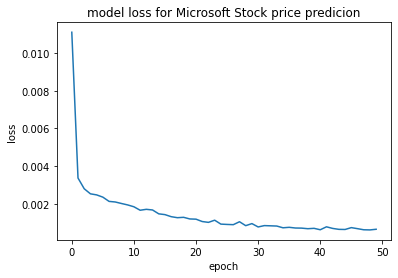

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss for Microsoft Stock price predicion')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
dataset_test = df.iloc[9000:, 1:2]
dataset_test.shape

(269, 1)

In [ ]:
dataset_train = df.iloc[:9000, 1:2]
dataset_test = df.iloc[9000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 269):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(239, 30, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 9ms/step


In [ ]:
true_y=dataset_test.values

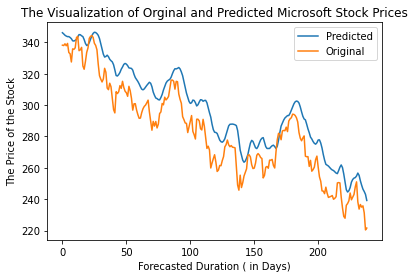

In [ ]:


plt.plot(predicted_stock_price, label='Predicted')
plt.plot(true_y[0:239], label='Original')
plt.xlabel('Forecasted Duration ( in Days)')
plt.ylabel('The Price of the Stock')
plt.title('The Visualization of Orginal and Predicted Microsoft Stock Prices')
plt.legend()


In [ ]:
predicted_stock_price.shape

(239, 1)

In [ ]:
true_y[0:239].shape

(239, 1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
error=math.sqrt(mean_squared_error(predicted_stock_price,true_y[0:239]))
error

15.581931283773116